**Module 6: Exploratory Data Analysis (EDA)**

**Lab Practice-6.1**

**Title:** Customer Churn Analysis for a Telecom Company

**Problem Statement:** A telecom company is looking to reduce customer churn. Perform EDA on customer data to uncover key factors influencing churn. Create visualizations to communicate these insights to the management team.

**Steps to be followed:**

1.	Create Sample Dataset:
   a. Seed Initialization: Set a random seed for reproducibility using np.random.seed(42).
   b. Generate Data: Create a dictionary customer_data with sample data for 1000 customers, including the following attributes:
              customer_id
              gender (randomly chosen from 'male' and 'female')
              age (random integer between 18 and 90)
              tenure (random integer between 1 and 72 months)
              monthly_charges (random float between 20 and 120)
              contract_type (randomly chosen from 'Month-to-month', 'One year', 'Two year')
              payment_method (randomly chosen from 'Electronic check', 'Mailed check', 'Bank transfer', 'Credit card')
              internet_service (randomly chosen from 'DSL', 'Fiber optic', 'No')
              phone_service, multiple_lines, online_security, online_backup, device_protection, tech_support, streaming_tv, streaming_movies, paperless_billing (random binary indicators, 0 or 1)
              churn (binary indicator for churn, 0 or 1, with an 80% probability of 0 and 20% probability of 1)
  
2.	Load Data into DataFrame:
   a. Convert to DataFrame: Convert the customer_data dictionary into a pandas DataFrame df.
   b. Calculate Total Charges: Calculate total_charges as the product of tenure and monthly_charges.
  
3.	Perform EDA:
   a. Basic Statistics: Display basic statistics of the DataFrame using df.describe().
   b. Visualizations:
      i. Distribution of Churn: Plot the count of churned vs. non-churned customers using sns.countplot.
      ii. Churn by Gender: Plot the count of churn by gender using sns.countplot with hue set to churn.
      iii. Churn by Contract Type: Plot the count of churn by contract type using sns.countplot with hue set to churn.
      iV. Monthly Charges Distribution by Churn: Plot the distribution of monthly charges for churned and non-churned customers using sns.histplot with KDE.
       V. Tenure Distribution by Churn: Plot the distribution of tenure for churned and non-churned customers using sns.histplot with KDE.
      Vi. Pairplot: Create a pairplot to visualize the relationships between age, tenure, monthly_charges, total_charges, and churn using sns.pairplot.

  
4.	Handle Non-Numeric Columns:
   a. Convert to Dummies: Convert categorical variables to dummy/indicator variables using pd.get_dummies and drop the first category to avoid multicollinearity.

6.	Correlation Heatmap:
   a. 	Calculate Correlation Matrix: Calculate the correlation matrix of the DataFrame with dummy variables (df_dummies).
   b. Plot Heatmap: Plot the correlation heatmap using sns.heatmap.

8.	Save Cleaned Data:
   a. Save to CSV: Save the cleaned and processed DataFrame to a CSV file named customer_churn_data.csv.

9.	Display Outputs:
   a. Print Head: Display the first few rows of the DataFrame using print(df.head()).
   b. Print Completion Message: Print a message indicating the completion of EDA and saving of the cleaned dataset.


**Step 1:Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Step 2:Create Sample Dataset**

In [3]:
np.random.seed(42)
# Create sample data
customer_data = {
    'customer_id': range(1, 1001),
    'gender': np.random.choice(['male', 'female'], 1000),
    'age': np.random.randint(18, 90, 1000),
    'tenure': np.random.randint(1, 72, 1000),
    'monthly_charges': np.random.uniform(20, 120, 1000),
    'contract_type': np.random.choice(['Month-to-month', 'One year', 'Two year'], 1000),
    'payment_method': np.random.choice(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'], 1000),
    'internet_service': np.random.choice(['DSL', 'Fiber optic', 'No'], 1000),
    'phone_service': np.random.choice([0, 1], 1000),
    'multiple_lines': np.random.choice([0, 1], 1000),
    'online_security': np.random.choice([0, 1], 1000),
    'online_backup': np.random.choice([0, 1], 1000),
    'device_protection': np.random.choice([0, 1], 1000),
    'tech_support': np.random.choice([0, 1], 1000),
    'streaming_tv': np.random.choice([0, 1], 1000),
    'streaming_movies': np.random.choice([0, 1], 1000),
    'paperless_billing': np.random.choice([0, 1], 1000),
    'churn': np.random.choice([0, 1], 1000, p=[0.8, 0.2])
}

**Step 3:Convert to DataFrame**

In [4]:
df = pd.DataFrame(customer_data)

**Step 4:Calculate total charges**

In [5]:
df['total_charges'] = df['tenure'] * df['monthly_charges']

**Step 5:Load Data into DataFrame**

In [6]:
print(df.head())

   customer_id  gender  age  tenure  monthly_charges   contract_type  \
0            1    male   80      14        83.130755  Month-to-month   
1            2  female   34       2        79.169716        Two year   
2            3    male   50      70        90.263377  Month-to-month   
3            4    male   46      17        43.743347        Two year   
4            5    male   30      28        71.236378        Two year   

  payment_method internet_service  phone_service  multiple_lines  \
0   Mailed check               No              1               0   
1  Bank transfer      Fiber optic              1               1   
2    Credit card               No              1               0   
3    Credit card      Fiber optic              1               1   
4   Mailed check               No              0               0   

   online_security  online_backup  device_protection  tech_support  \
0                0              0                  1             0   
1                0

**Step 6:Perform EDA**

In [7]:
# Basic statistics
print(df.describe())

       customer_id          age       tenure  monthly_charges  phone_service  \
count  1000.000000  1000.000000  1000.000000      1000.000000    1000.000000   
mean    500.500000    52.852000    34.821000        69.129006       0.498000   
std     288.819436    20.719348    20.475209        28.804979       0.500246   
min       1.000000    18.000000     1.000000        20.001163       0.000000   
25%     250.750000    34.750000    17.000000        45.257650       0.000000   
50%     500.500000    53.000000    34.000000        68.764744       0.000000   
75%     750.250000    71.000000    52.000000        93.270766       1.000000   
max    1000.000000    89.000000    71.000000       119.782086       1.000000   

       multiple_lines  online_security  online_backup  device_protection  \
count     1000.000000      1000.000000    1000.000000        1000.000000   
mean         0.497000         0.504000       0.509000           0.478000   
std          0.500241         0.500234       0.5001

**Step 7: Visulization**

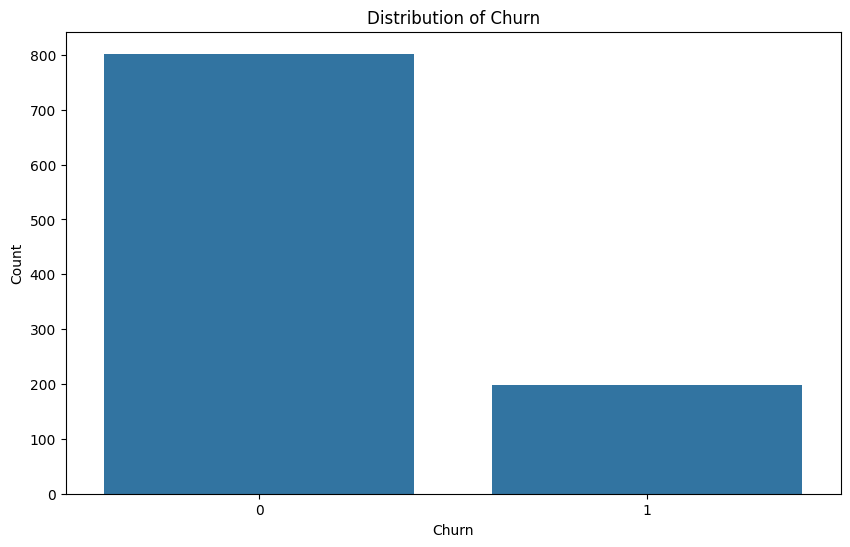

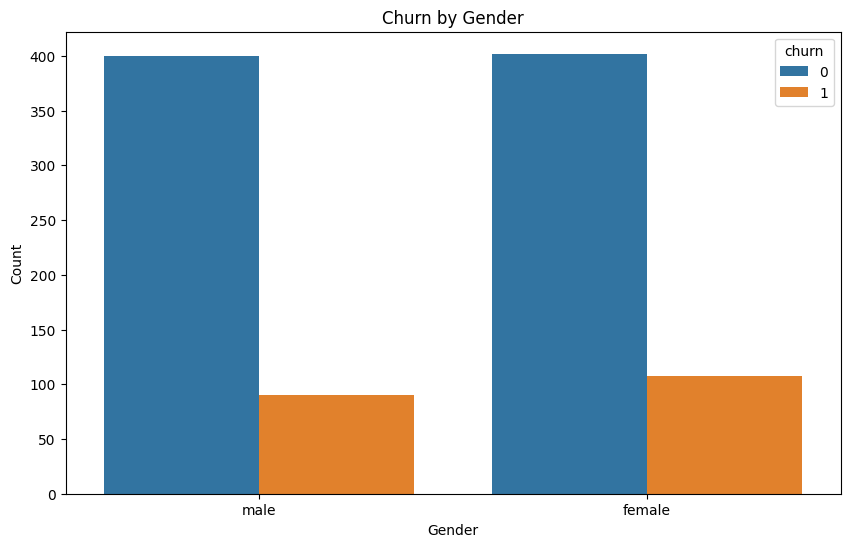

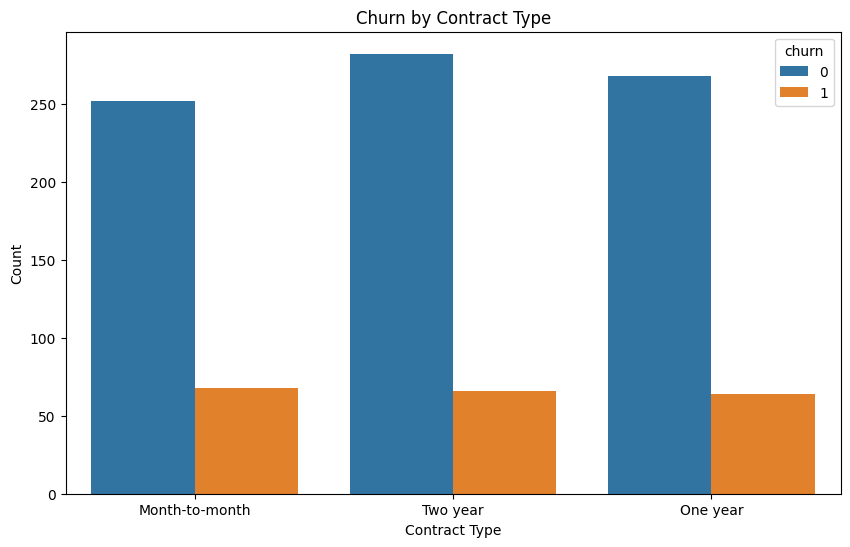

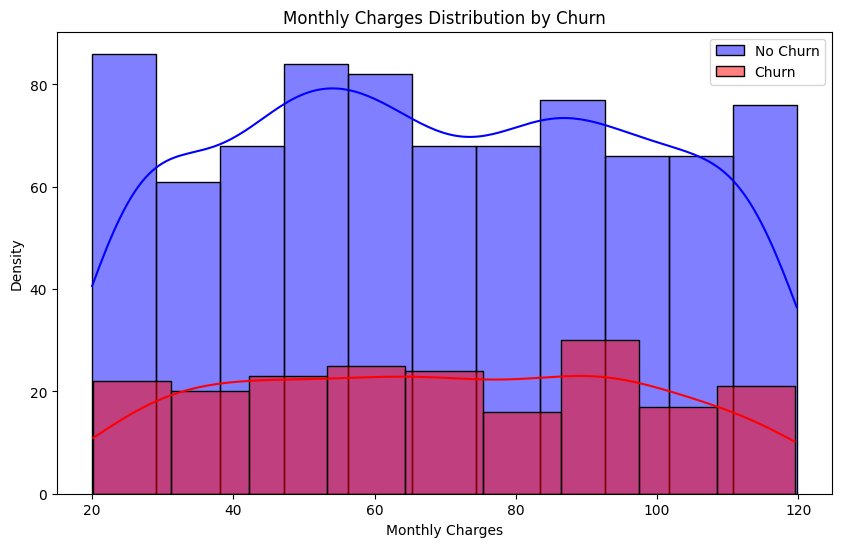

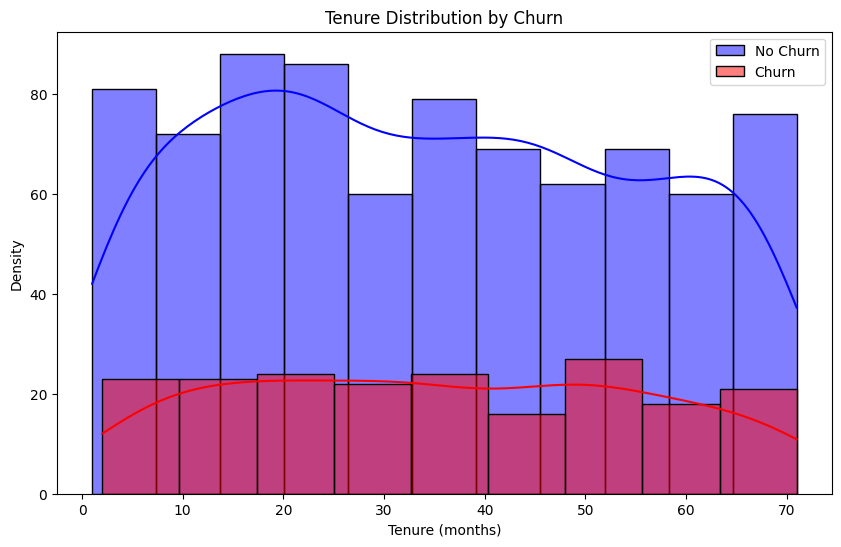

In [8]:
# Distribution of churn
plt.figure(figsize=(10, 6))
sns.countplot(x='churn', data=df)
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

# Churn by gender
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='churn', data=df)
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Churn by contract type
plt.figure(figsize=(10, 6))
sns.countplot(x='contract_type', hue='churn', data=df)
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

# Monthly charges distribution by churn
plt.figure(figsize=(10, 6))
sns.histplot(df[df['churn'] == 0]['monthly_charges'], kde=True, color='blue', label='No Churn')
sns.histplot(df[df['churn'] == 1]['monthly_charges'], kde=True, color='red', label='Churn')
plt.title('Monthly Charges Distribution by Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.legend()
plt.show()

# Tenure distribution by churn
plt.figure(figsize=(10, 6))
sns.histplot(df[df['churn'] == 0]['tenure'], kde=True, color='blue', label='No Churn')
sns.histplot(df[df['churn'] == 1]['tenure'], kde=True, color='red', label='Churn')
plt.title('Tenure Distribution by Churn')
plt.xlabel('Tenure (months)')
plt.ylabel('Density')
plt.legend()
plt.show()



**Step 8:Pairplot to see the relationship between numerical features and churn**

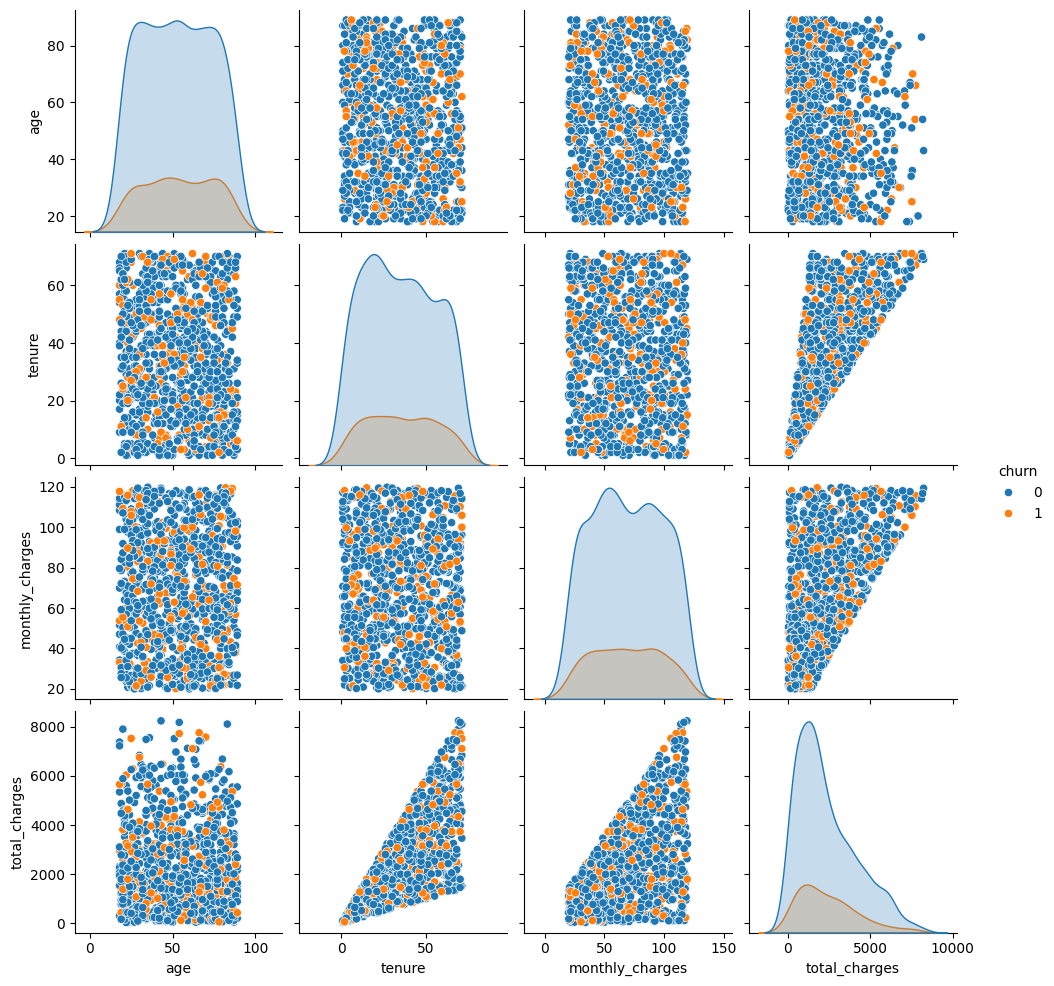

In [9]:
sns.pairplot(df[['age', 'tenure', 'monthly_charges', 'total_charges', 'churn']], hue='churn')
plt.show()


**Step 9:Convert categorical variables to dummy/indicator variables**

In [10]:
df_dummies = pd.get_dummies(df.drop(columns=['customer_id']), drop_first=True)

**Step 10:Correlation heatmap**

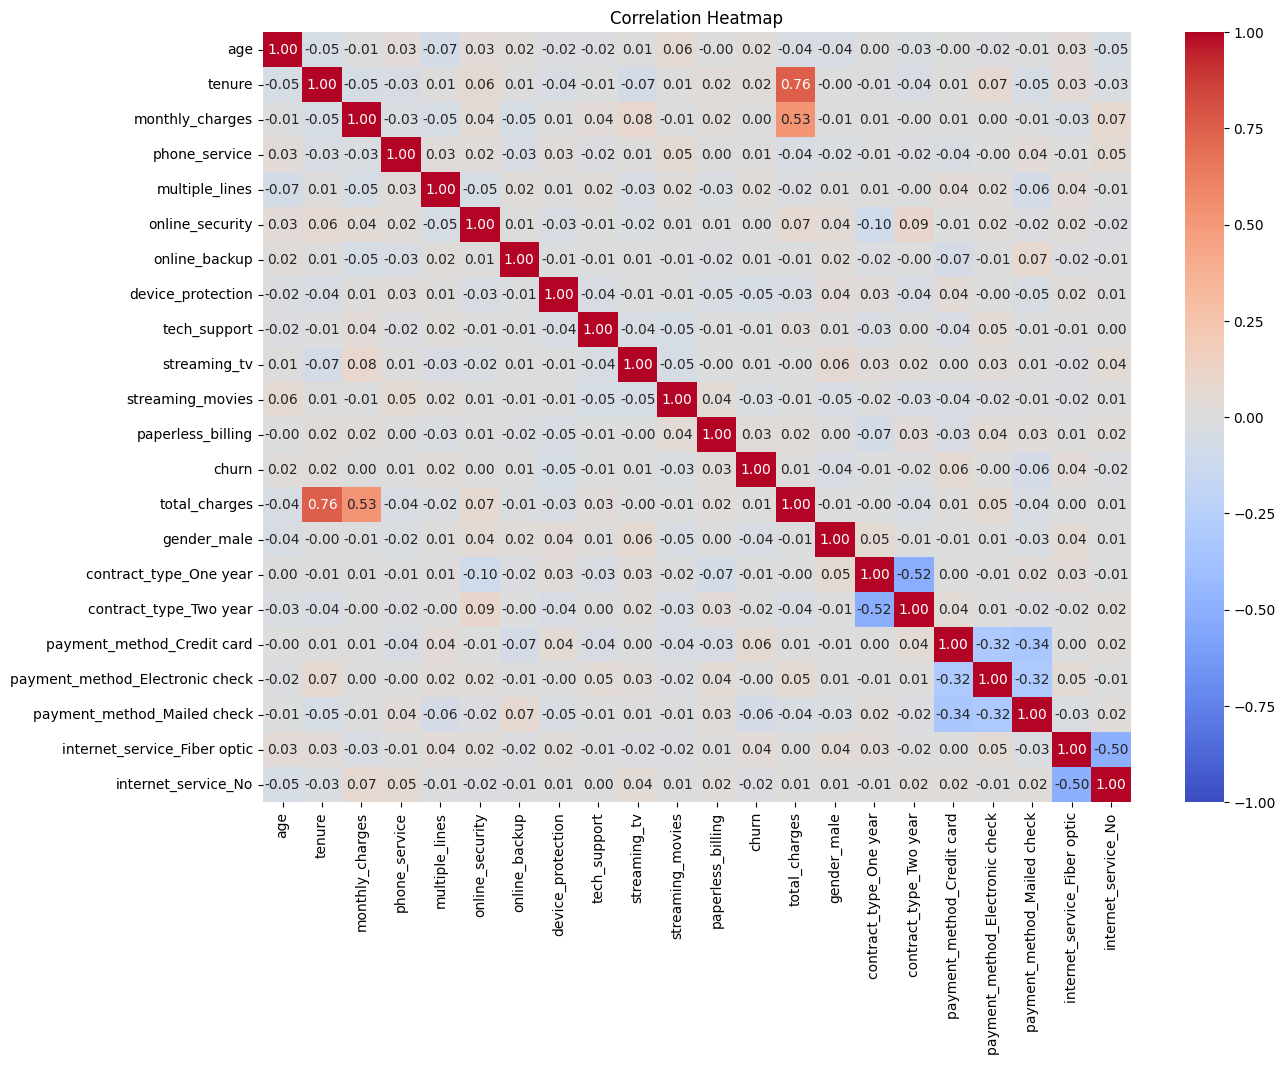

In [11]:
plt.figure(figsize=(14, 10))
sns.heatmap(df_dummies.corr(), annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


**Step 11: Save the cleaned and processed data to CSV**

In [13]:
df.to_csv('customer_churn_data.csv', index=False)

print("EDA complete. Cleaned dataset saved to CSV.")


EDA complete. Cleaned dataset saved to CSV.
